In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url="https://en.wikipedia.org/wiki/List_of_companies_of_Nepal"
response=requests.get(url)
soup=BeautifulSoup(response.content,"lxml")


In [3]:
lists=soup.find('table')

In [4]:
title_list=lists.find_all("th")
all_title=[title.text.strip() for title in title_list]
print(all_title)

['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes']


In [5]:
df=pd.DataFrame(columns=all_title)

pd.set_option('display.max_rows', None)
df


,Name,Industry,Sector,Headquarters,Founded,Notes


In [6]:
table_rows=lists.find_all("tr")
for row in table_rows[1:]:
    row_data=row.find_all("td")    
    table_data=[data.text.strip() for data in row_data ]
    length=len(df)
    df.loc[length]=table_data
    

In [7]:
df

,Name,Industry,Sector,Headquarters,Founded,Notes
0,Agni Air,Consumer services,Airlines,Kathmandu,2006,"Airline, defunct 2006"
1,Agriculture Development Bank,Financials,Banks,Kathmandu,1968,"Bank, rural credit institution"
2,Air Nepal International,Consumer services,Airlines,Kathmandu,2005,"Airline, defunct 2006"
3,Asian Airlines,Consumer services,Airlines,Kathmandu,2002[6],"Airline, defunct 2006"
4,Bajeko Sekuwa,Consumer services,Restaurants & bars,Kathmandu,?,Restaurant chain
5,Base Air,Consumer services,Airlines,?,2004,"Airline, defunct 2007"
6,Bhatbhateni supermarket,Consumer services,Retail Chain,Kathmandu,1984,
7,Buddha Air,Consumer services,Airlines,Jawalakhel,1997,Domestic airline
8,Chaudhary Group,Conglomerates,-,Kathmandu,1968,"Consumer goods, financials, industrials"
9,Cosmic Air,Consumer services,Airlines,Kathmandu,1997,"Airline, defunct 2008"


In [8]:
df.shape

(56, 6)

In [9]:
df.to_csv("top_companies_of_nepal.csv",index=False)

In [10]:
df.columns

Index(['Name', 'Industry', 'Sector', 'Headquarters', 'Founded', 'Notes'], dtype='object')

Index(['Kathmandu', '?', 'Lalitpur', 'Nepalgunj', 'Jawalakhel', 'Birtamod',
       'Biratnagar', 'Janakpur'],
      dtype='object', name='Headquarters')


Text(0.5, 1.0, 'Frequency of Headquarters by City')

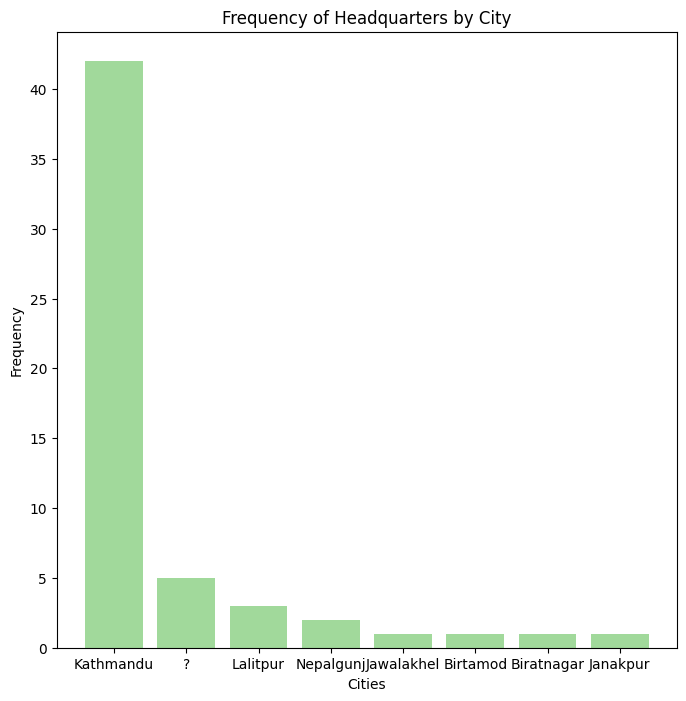

In [11]:
plt.figure(figsize=(8,8))
value_counts=df['Headquarters'].value_counts()
print(value_counts.index)
plt.bar(value_counts.index,value_counts,color="#a1d99b")
plt.xlabel("Cities")
plt.ylabel("Frequency")
plt.title("Frequency of Headquarters by City")

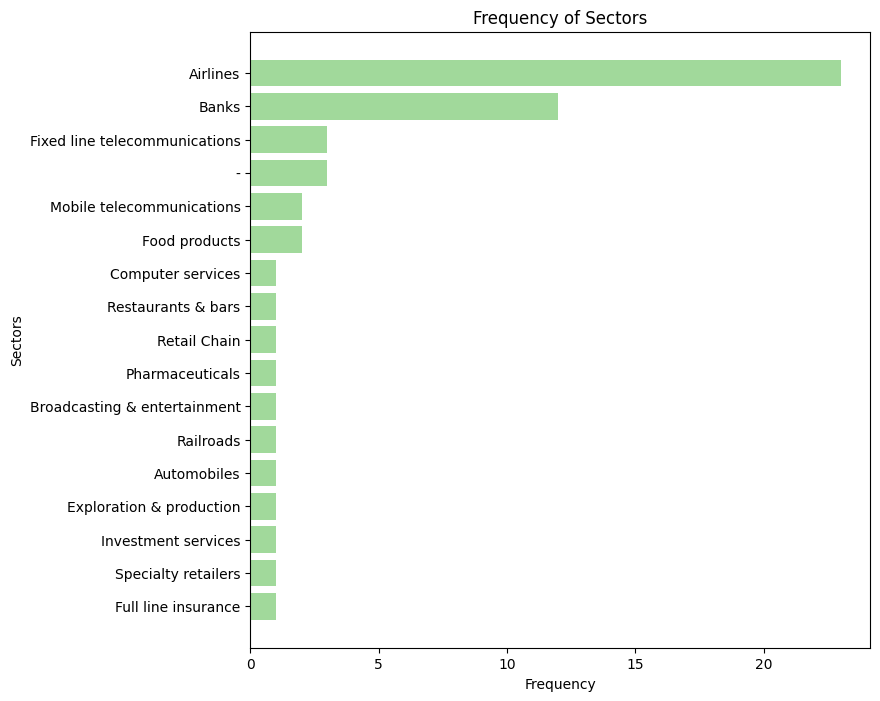

In [12]:
plt.figure(figsize=(8,8))
count_sector=df['Sector'].value_counts().sort_values(ascending=False)
plt.barh(count_sector.index[::-1],count_sector[::-1],color="#a1d99b")
plt.xlabel("Frequency")
plt.ylabel("Sectors")
plt.title("Frequency of Sectors")
plt.show()
